In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)

2.2.0
2.3.0-tf


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Zad 

Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

In [33]:
from keras.datasets import cifar10
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)



(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
(32, 32, 3)


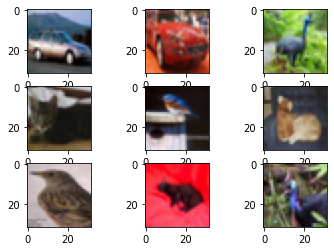

In [4]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

### Normalize

In [34]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
# x_train = X_train.reshape(X_train.shape[0], 32,32,3)
# x_test = X_test.reshape(X_test.shape[0], 32,32,3) 


X_train[0].shape
# x_train[0].shape

(32, 32, 3)

# Zadanie 
Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

In [40]:
from keras import models, layers

model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="relu", input_shape=(32,32,3), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="valid"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation="relu"))

#Output Layer with softmax activation
model.add(layers.Dense(4, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"]) 
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 27, 27, 16)        2416      
_________________________________________________________________
average_pooling2d_20 (Averag (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 9, 9, 120)         48120     
_________________________________________________________________
flatten_10 (Flatten)         (None, 9720)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 84)              

In [41]:
hist = model.fit(x=X_train,y=y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1) 

Train on 7000 samples, validate on 4000 samples
Epoch 1/10
7000/7000 [==============================] - 19s 3ms/step - loss: 1.0601 - accuracy: 0.5271 - val_loss: 0.8576 - val_accuracy: 0.6557
Epoch 2/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.8235 - accuracy: 0.6630 - val_loss: 0.7612 - val_accuracy: 0.6945
Epoch 3/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.7240 - accuracy: 0.7077 - val_loss: 0.6856 - val_accuracy: 0.7315
Epoch 4/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.6596 - accuracy: 0.7339 - val_loss: 0.6910 - val_accuracy: 0.7205
Epoch 5/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.6321 - accuracy: 0.7540 - val_loss: 0.6484 - val_accuracy: 0.7480
Epoch 6/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.5776 - accuracy: 0.7729 - val_loss: 0.6485 - val_accuracy: 0.7462
Epoch 7/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.553

In [42]:
model.predict_proba(X_test)

array([[3.0934414e-02, 9.3370276e-03, 3.2880047e-01, 6.3092810e-01],
       [6.4634842e-01, 3.2759187e-01, 2.4293201e-02, 1.7666542e-03],
       [2.9316671e-02, 2.5729996e-01, 9.7656183e-02, 6.1572719e-01],
       ...,
       [4.1104523e-03, 1.8385867e-02, 1.8144032e-01, 7.9606330e-01],
       [5.3974445e-04, 1.1145014e-04, 3.1034192e-01, 6.8900692e-01],
       [1.1973284e-01, 8.6191821e-01, 9.5869843e-03, 8.7620430e-03]],
      dtype=float32)

In [0]:
model.predict_classes(X_test)

array([2, 1, 3, ..., 3, 3, 0], dtype=int64)

In [43]:
model.predict_classes(X_test)

array([3, 0, 3, ..., 3, 3, 1])

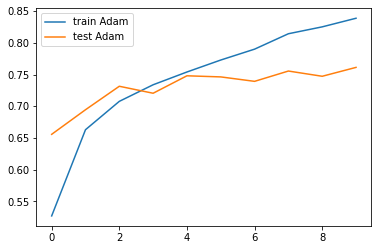

In [45]:
plt.plot(hist.history['accuracy'], label = "train Adam")
plt.plot(hist.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

In [76]:
test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100)) 

4000/4000 [==============================] - 4s 981us/step
Test loss 0.6315, accuracy 76.13%


In [49]:
model.predict_classes(X_test)[0]

3

In [0]:
    classes=['plane','car','bird','cat','dear','dog','frog','horse','ship','truck'] 

In [68]:
classes[np.argmax(y_train[0])]

'car'

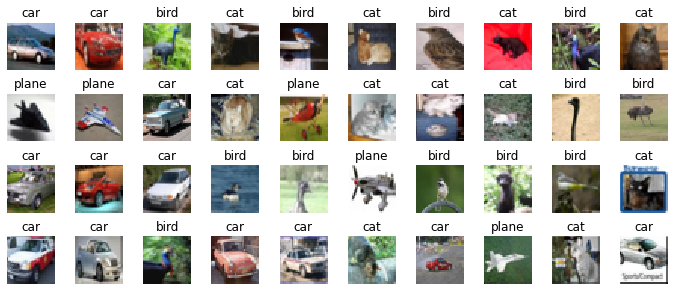

In [70]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(classes[np.argmax(y_train[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



In [0]:
predicted = model.predict_classes(X_test)

In [81]:
predicted

array([3, 0, 3, ..., 3, 3, 1])

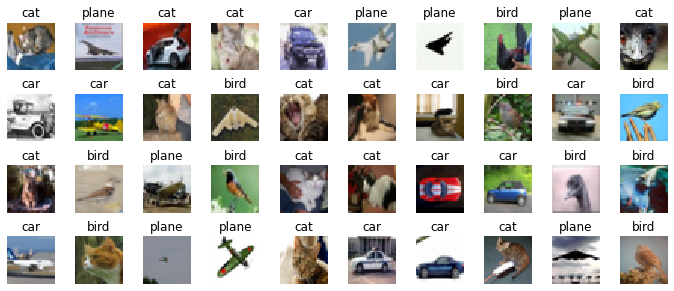

In [82]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(classes[predicted[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()